In [2]:
%matplotlib ipympl
from impedance.models.circuits.elements import element
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy
import matplotlib.pyplot as plt

@element(num_params=3, units=["Ohm", "F", ""],overwrite=True)
def TLMunix(p,f):
    omega = 2 * np.pi * np.array(f)
    R1, Q, alpha = p[0], p[1], p[2]
    Z= 2*np.sqrt(R1/((omega*1j)**alpha*Q))*(1/(np.tanh(np.sqrt((1j*omega)**alpha*R1*Q))))
    return Z

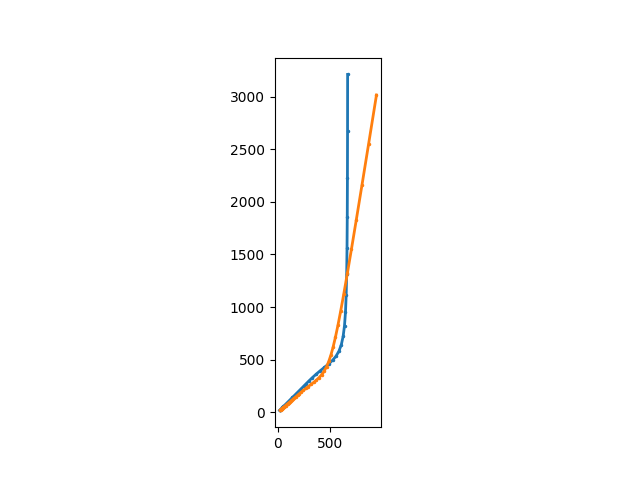

In [8]:
freq_list=np.logspace(-1,3,50)
c_exp = CustomCircuit(initial_guess=[1000,1e-3,1],circuit="TLMunix")
z_exp=c_exp.predict(frequencies=freq_list)

c_to_fit = CustomCircuit(initial_guess=[700,1e-3,0.9],circuit="TLMunix")
z_to_fit=c_to_fit.predict(frequencies=freq_list)


fig, ax=plt.subplots()
ax.plot(np.real(z_exp),-np.imag(z_exp),".",ms=3,linestyle="-",label="Fit",linewidth=2)
ax.plot(np.real(z_to_fit),-np.imag(z_to_fit),".",ms=3,linestyle="-",label="Fit",linewidth=2)
ax.set_aspect("equal")